In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [2]:
X, Y = load_planar_dataset()

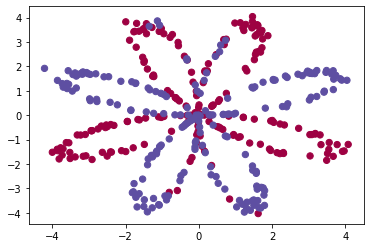

In [3]:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)

In [4]:
shape_X = X.shape
shape_Y = Y.shape

m = shape_X[1]

shape_X, shape_Y, m

((2, 400), (1, 400), 400)

In [5]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

R:\Work\Anacond\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accurayc: 47.0


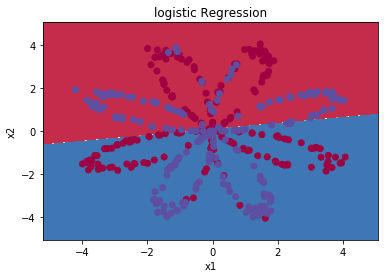

In [6]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("logistic Regression")

LR_predictions = clf.predict(X.T)
print("Accurayc: {}".format(float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)))

### Neural Network Model

In [7]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return n_x, n_h, n_y

In [8]:
def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return params

In [24]:
def forward_prop(X, params):
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    
    return A2, cache

In [48]:
def calculate_cost(A2, Y, params):
    m = Y.shape[1]
    
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -1/m * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))
    return cost

In [26]:
def backprop(params, cache, X, Y):
    m = X.shape[1]
    
#     Z1 = cache["Z1"]
    A1 = cache["A1"]
#     Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    W1 = params["W1"]
#     b1 = params["b1"]
    W2 = params["W2"]
#     b2 = params["b2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    
    return grads

In [27]:
def update_params(params, grads, learning_rate=1.2):
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return params    

### NN Model

In [49]:
def nn_model(X, Y, n_h, num_iter=10_000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    params = init_params(n_x, n_h, n_y)
    
    for i in range(num_iter):
        A2, cache = forward_prop(X, params)
        
        cost = calculate_cost(A2, Y, params)
        
        grads = backprop(params, cache, X, Y)
        
        params = update_params(params, grads)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iter {}: {}".format(i, cost))
        
    return params

In [50]:
def predict(params, X):
    A2, cache = forward_prop(X, params)
    preds = (A2 > 0.5)
    
    return preds

Cost after iter 0: 0.6931751904394944
Cost after iter 1000: 0.287322216894809
Cost after iter 2000: 0.2739122642088844
Cost after iter 3000: 0.2668125752034274
Cost after iter 4000: 0.26232340499335677
Cost after iter 5000: 0.2592444799902141
Cost after iter 6000: 0.25701872963415584
Cost after iter 7000: 0.2553436438915693
Cost after iter 8000: 0.2540408229405381
Cost after iter 9000: 0.2529991013252725


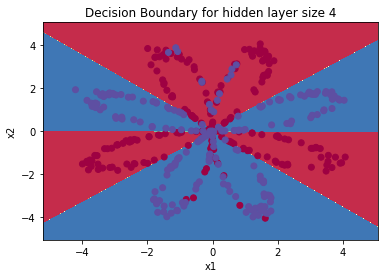

In [51]:
params = nn_model(X, Y, n_h = 4, num_iter = 10_000, print_cost = True)

plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size 4")
plt.show()

In [54]:
preds = predict(params, X)
p = ((np.dot(Y, preds.T) + np.dot(1-Y, 1-preds.T)) / float(Y.size)*100)
print("Accuracy: {}%".format(p[0, 0]))

Accuracy: 91.0%


### Turning hidden layer size

Accuracy for 1 hidden units: 67.5%
Accuracy for 2 hidden units: 67.25%
Accuracy for 3 hidden units: 90.75%
Accuracy for 4 hidden units: 90.75%
Accuracy for 5 hidden units: 91.5%
Accuracy for 20 hidden units: 90.25%
Accuracy for 50 hidden units: 90.75%


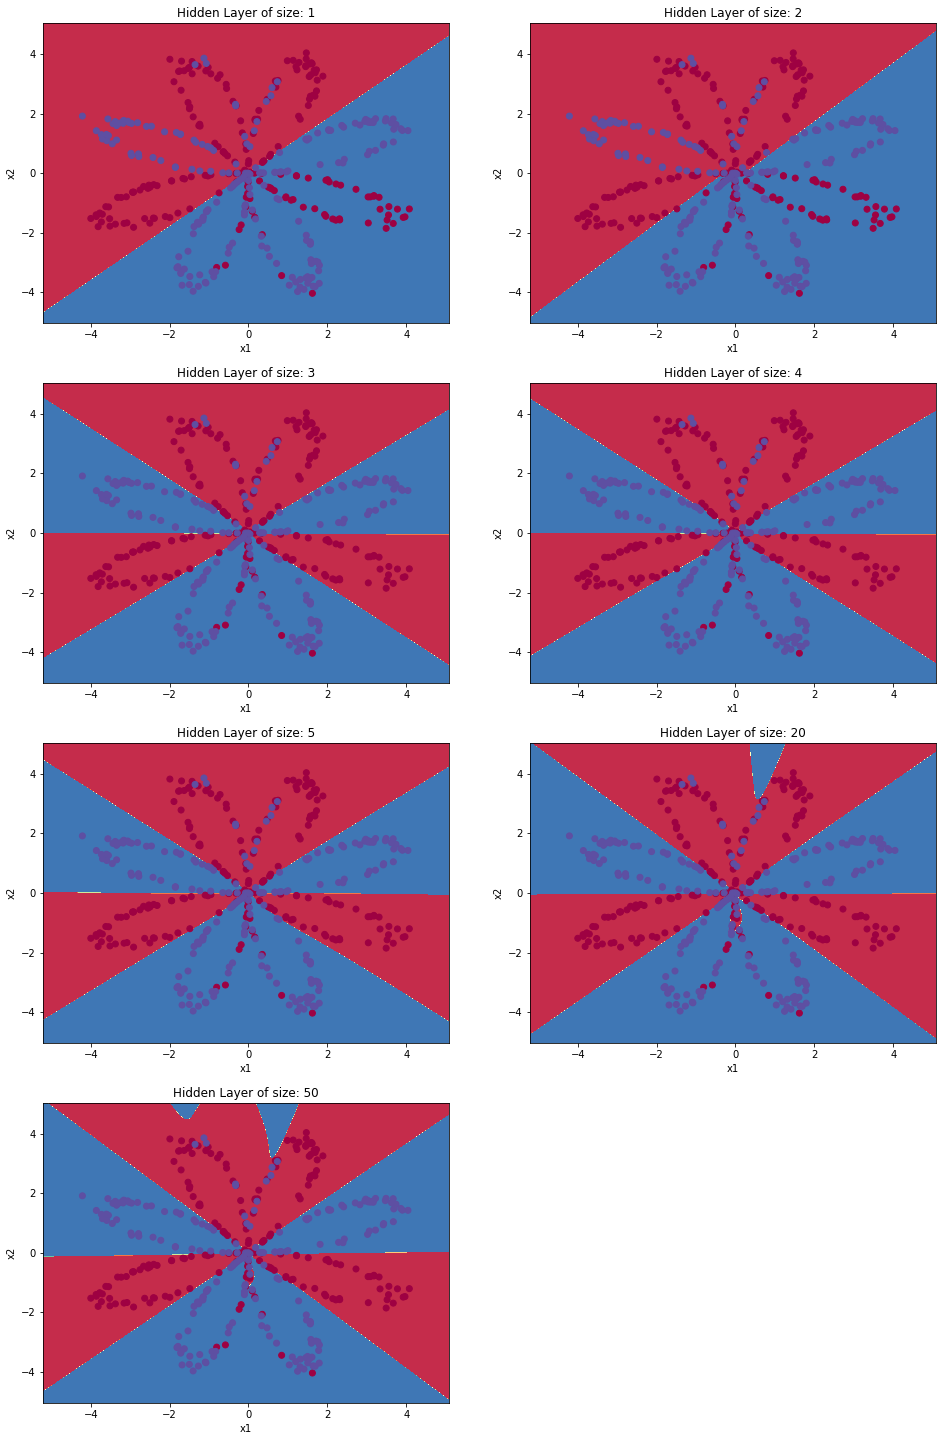

In [58]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title("Hidden Layer of size: {}".format(n_h))
    params = nn_model(X, Y, n_h, num_iter=5000)
    plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
    preds = predict(params, X)
    acc = float((np.dot(Y, preds.T) + np.dot(1-Y, 1-preds.T)) / float(Y.size)*100)
    print("Accuracy for {} hidden units: {}%".format(n_h, acc))

### Other dataset

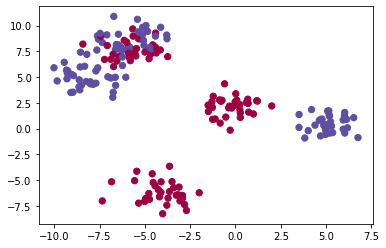

In [59]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {
    "noisy_circles":noisy_circles,
    "noisy_moons":noisy_moons,
    "blobs":blobs,
    "gaussian_quantiles":gaussian_quantiles
}

dataset = "blobs"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

if dataset == "blobs":
    Y = Y%2

    plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)